# COGS 108 Final Project

## Group Members 
- Hao-In Choi: A14726076 
- Lereanne Mendoza: A14696819 
- Victoria Vu: A13797934 
- Mayu Wilson: A13625483 

### Introduction & Background  

#### Research Question 
<i>What are some key factors that make a YouTube channel popular? For people who are aiming to grow their channel popularity and online presence, what can they consider in doing so and potentially becoming as popular as other channels?</i> 

#### Hypothesis
Our hypothesis is that there is no relationship between the grade of the channel with the number of subscribers, video uploads, and video views. However, there may be at least one significant relationship between the channel grade and other predictors. With this, we predict that the number of subscribers will strongly affect the grades of the channels. With this hypothesis, we also want to consider other potential predictions, such as considering whether or not more video uploads garners in more views as well as subscribers, the subscribers gathering in more views, and more. 

As social media platforms such as Instagram and Youtube have become more popular, there has also been an influx in the number of people who earn their living by producing content on these platforms. Our team wants to see how attainable it is for an ordinary person to reach the ranks of these social media, content creators. More specifically, we want to see which factor most significantly affects the grade a channel receives on SocialBlade, which is highly linked to the rank. We hypothesize that at least one of the factors that our data set has provided will have a strong correlation to the grade. 

We feel that this hypothesis is important because those interested in creating an online presence and growing their YouTube channel may feel like they must follow a specific algorithm in doing so, and even if this is the case, they are more aware of how to match the success of social media, content creators who are highly popular. 

### Data Description 

The dataset that our team used comes from https://www.kaggle.com/mdhrumil/top-5000-youtube-channels-data-from-socialblade. 

This dataset specifically shows the top 5000 YouTube channels, based on statistics and analytics conducted by a company called SocialBlade. Per SocialBlade, "Social Blade is a statistics website that allows you to track your statistics and measure growth across multiple social media platforms including YouTube, Twitch, and Instagram." With this, the dataset specifically contains different variables for YouTube channels, such as channel rankings, SocialBlade's given channel grade, and basic YouTube information (YouTube channel name, number of subscribers, number of videos, and number of views per video upload). 

### Import of Packages

In [1]:
# Import of all packages needed

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.stats as stats 
import seaborn as sns 
from sklearn import linear_model
import statsmodels.api as sm

### Data Cleaning and Pre-Processing 

In [2]:
# Loading the YouTube data

df_youtube = pd.read_csv('data.csv') 

In [3]:
df_youtube

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757.0,18752951.0,20869786591
1,2nd,A++,T-Series,12661.0,61196302.0,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082
3,4th,A++,SET India,27323.0,31180559.0,22675948293
4,5th,A++,WWE,36756.0,32852346.0,26273668433
5,6th,A++,Movieclips,30243.0,17149705.0,16618094724
6,7th,A++,netd müzik,8500.0,11373567.0,23898730764
7,8th,A++,ABS-CBN Entertainment,100147.0,12149206.0,17202609850
8,9th,A++,Ryan ToysReview,1140.0,16082927.0,24518098041
9,10th,A++,Zee Marathi,74607.0,2841811.0,2591830307


Our team noticed that the dataset contained empty values, specifically either under "Video Uploads" or “Subscribers”. Although we tried to look them up manually, the reason why these values were empty is because those corresponding channels may have hid them purposely or removed their affiliation with SocialBlade. With this, we decided to drop these rows. 

In [4]:
# Dropping all rows that contained empty values

df_youtube.dropna(inplace = True)

In [5]:
df_youtube

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757.0,18752951.0,20869786591
1,2nd,A++,T-Series,12661.0,61196302.0,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082
3,4th,A++,SET India,27323.0,31180559.0,22675948293
4,5th,A++,WWE,36756.0,32852346.0,26273668433
5,6th,A++,Movieclips,30243.0,17149705.0,16618094724
6,7th,A++,netd müzik,8500.0,11373567.0,23898730764
7,8th,A++,ABS-CBN Entertainment,100147.0,12149206.0,17202609850
8,9th,A++,Ryan ToysReview,1140.0,16082927.0,24518098041
9,10th,A++,Zee Marathi,74607.0,2841811.0,2591830307


### Data Visualization 

Firstly, we will visualize the data via a correlation, scatter matrix. This is to see if there are any noticeable correlations between certain variables, such that we can apply certain correlation methods to the right variables. 

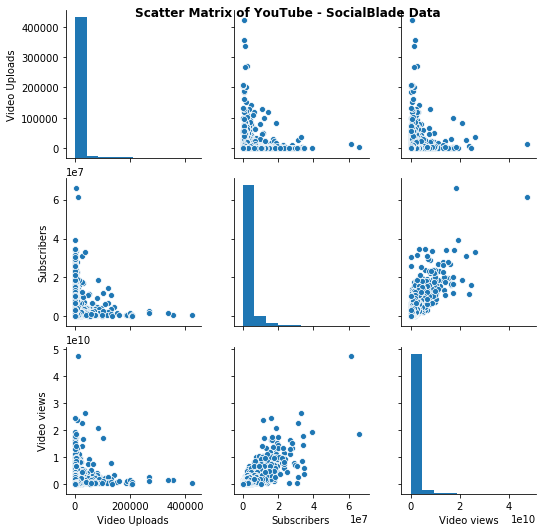

In [6]:
# Creating a correlation, scatter matrix in order to check for noticeable correlations 

youtube_scatter = sns.pairplot(df_youtube)
youtube_scatter.fig.suptitle('Scatter Matrix of YouTube - SocialBlade Data', fontweight = 'bold')
plt.show()

Based on the scatter matrix, there appears to be several weak correlations between video uploads and video views, as well as subscribers and video uploads, and vice versa. However, we can see a decently strong correlation between subscribers and video views, and vice versa. Based on this, we are going to create a dataframe specifically for this correlation. 

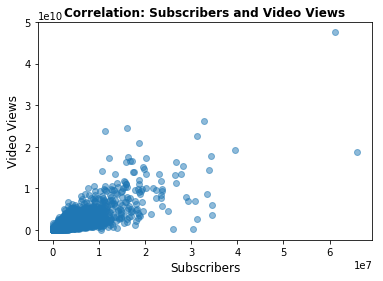

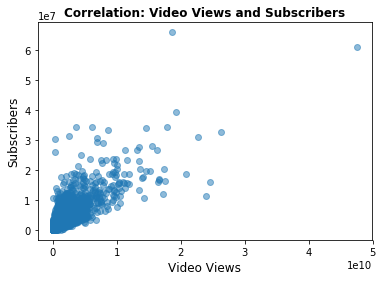

In [7]:
df_subViews = plt.scatter(df_youtube['Subscribers'], df_youtube['Video views'], alpha = 0.5) 
plt.title('Correlation: Subscribers and Video Views', fontweight = 'bold')
plt.xlabel('Subscribers', fontsize = 12)
plt.ylabel('Video Views', fontsize = 12)
plt.show()

df_viewsSubs = plt.scatter(df_youtube['Video views'], df_youtube['Subscribers'], alpha = 0.5) 
plt.title('Correlation: Video Views and Subscribers', fontweight = 'bold')
plt.xlabel('Video Views', fontsize = 12)
plt.ylabel('Subscribers', fontsize = 12)
plt.show()

In [8]:
df_subViews = pd.DataFrame(df_youtube, columns = ['Subscribers', 'Video views'])
df_subViews.corr()

,Subscribers,Video views
Subscribers,1.000000,0.791241
Video views,0.791241,1.000000


In [9]:
df_viewsSubs = pd.DataFrame(df_youtube, columns = ['Video views', 'Subscribers'])
df_viewsSubs.corr()

,Video views,Subscribers
Video views,1.000000,0.791241
Subscribers,0.791241,1.000000


### Data Analysis and Results 

### Privacy and Ethics Consideration 

The creator of the dataset states that they gathered the data for fun, which means that they are allowing the data to be used by anyone regardless of the purpose. Generally speaking, because the data that is on SocialBlade (the grade and how it is determined) is public and can be seen by the public, there are no specific terms that must be met nor are there are any specific privacy concerns that our team needed to handle in regards to the dataset that we used. Although there are not many privacy issues that concerned us, we had to consider that there may have been potential biases in the dataset. 

(cont. here)

### Conclusion and Discussion